# Business Context and Objectives

In competitive retail environments, understanding customer behavior is essential to optimize marketing investments and maximize profitability. Not all customers generate the same value, and applying uniform marketing strategies may lead to inefficient resource allocation.

The objective of this project is to segment customers based on their purchasing behavior using an RFM-based approach. By identifying groups with distinct behavioral patterns, the company can prioritize high-value customers, reactivate dormant segments, and design targeted marketing strategies tailored to each customer profile.

This segmentation aims to support data-driven decision-making and improve overall marketing effectiveness.

# Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import datetime as dt

In [ ]:
df = pd.read_csv('online_retail.csv')

# Data Understanding

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
display(df.info())
display(df.describe())
display(df.isnull().sum())
display(df['InvoiceNo'].astype(str).str.startswith('C').value_counts())
display((df['Quantity'] <= 0).value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


None

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


,count
InvoiceNo,
False,532621
True,9288


,count
Quantity,
False,531285
True,10624


Although cancellations are identified by InvoiceNo starting with 'C', in this dataset they are also associated with non-positive quantities. Therefore, filtering Quantity > 0 removes both invalid and cancelled transactions.

# Data Cleaning

In [ ]:
df = df[df['CustomerID'].notna()]
df = df[df['Quantity'] > 0]
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['CustomerID'] = df['CustomerID'].astype(int).astype(str) #It is not a numerical value, it is an identifier
df['TotalPrice'] = df['Quantity'] * df['UnitPrice'] #Create TotalPrice column
df = df.reset_index(drop = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  object        
 7   Country      397924 non-null  object        
 8   TotalPrice   397924 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 27.3+ MB


# EDA

EDA total sales per country

/tmp/ipython-input-3740687140.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df1['Country'], rotation=90)
/tmp/ipython-input-3740687140.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df2['Country'], rotation=90)


Text(0, 0.5, 'Total sales')

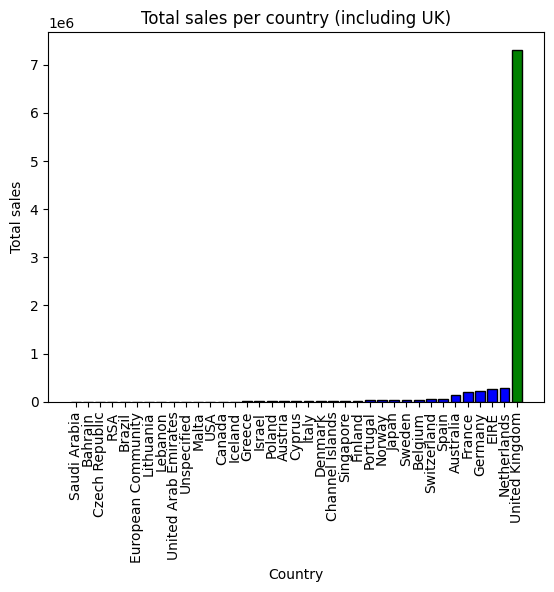

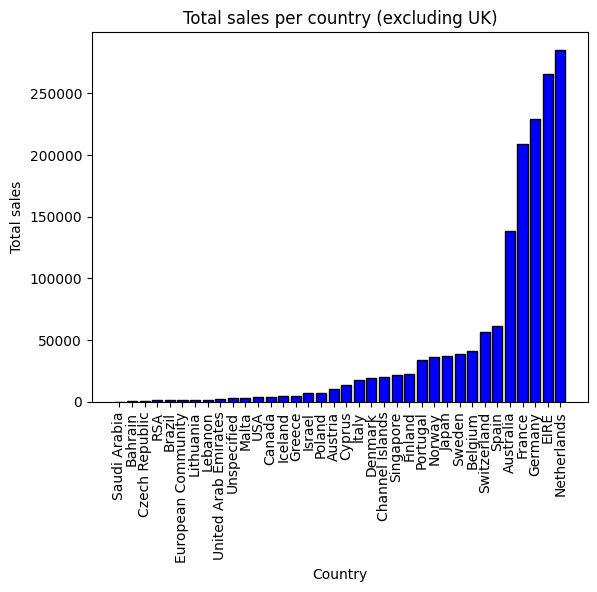

In [ ]:
df1 = df.groupby('Country')
df1 = df1['TotalPrice'].sum()
df1 = pd.DataFrame(df1)
df1 = df1.sort_values(by = 'TotalPrice', ascending=True)
df1 = df1.reset_index()
color_list = []
for i in df1['Country']:
  if i == 'United Kingdom':
    color_list.append('green')
  else:
    color_list.append('blue')
fig, ax = plt.subplots()
ax.bar(df1['Country'], df1['TotalPrice'], color = color_list, edgecolor = 'black')
ax.set_xticklabels(df1['Country'], rotation=90)
ax.set_title('Total sales per country (including UK)')
ax.set_xlabel('Country')
ax.set_ylabel('Total sales')
fig, ax1 = plt.subplots()
df2 = df1[df1['Country'] != 'United Kingdom']
ax1.bar(df2['Country'], df2['TotalPrice'], color = 'blue', edgecolor = 'black')
ax1.set_xticklabels(df2['Country'], rotation=90)
ax1.set_title('Total sales per country (excluding UK)')
ax1.set_xlabel('Country')
ax1.set_ylabel('Total sales')

EDA price and quantity

95 Percentile for Unit Price is 8.5
95 Percentile for Quantity is 36.0


Text(0.5, 0, 'Quantity')

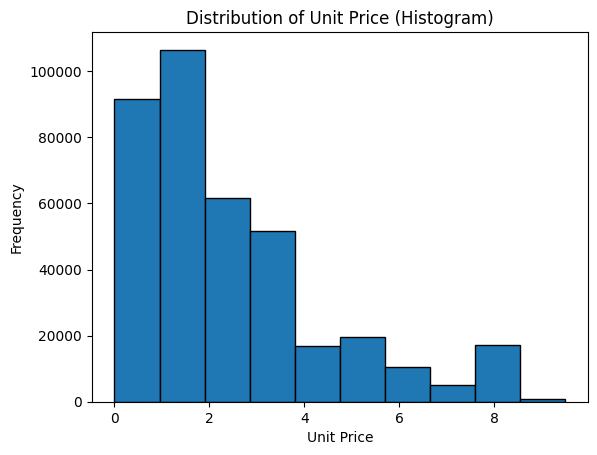

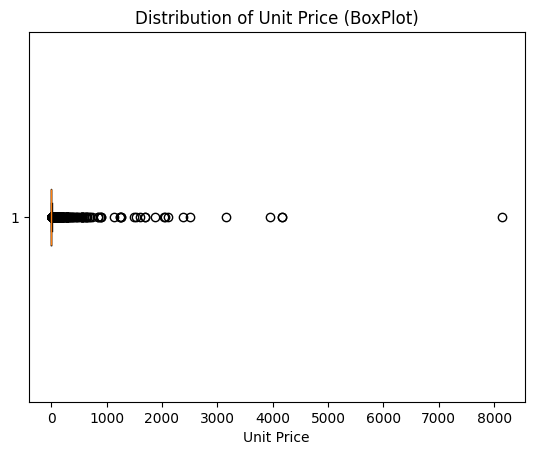

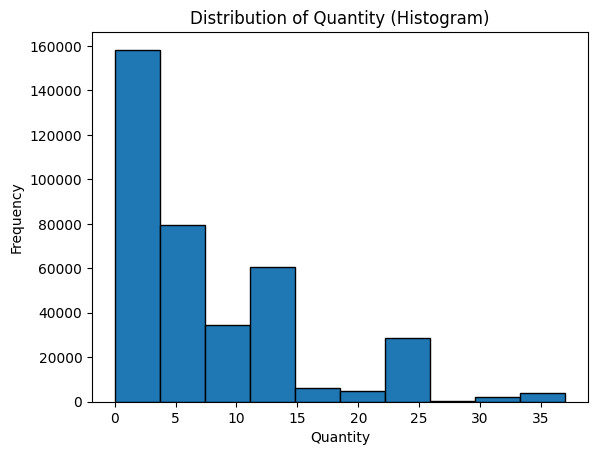

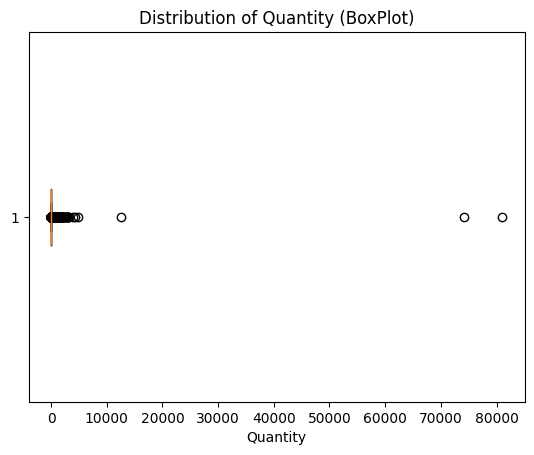

In [ ]:
percentile_95_unitprice = df['UnitPrice'].quantile(0.95)
print(f'95 Percentile for Unit Price is {percentile_95_unitprice}') #In order to avoid atypical values that may distort the histogram
fig, ax = plt.subplots()
ax.hist(df['UnitPrice'], range = [0,percentile_95_unitprice + 1], edgecolor = 'black')
ax.set_title('Distribution of Unit Price (Histogram)')
ax.set_xlabel('Unit Price')
ax.set_ylabel('Frequency')
fig, ax1 = plt.subplots()
ax1.boxplot(df['UnitPrice'], vert = False)
ax1.set_title('Distribution of Unit Price (BoxPlot)')
ax1.set_xlabel('Unit Price')
percentile_95_quantity = df['Quantity'].quantile(0.95)
print(f'95 Percentile for Quantity is {percentile_95_quantity}') #In order to avoid atypical values that may distort the histogram
fig, ax2 = plt.subplots()
ax2.hist(df['Quantity'], range = [0, percentile_95_quantity +1], edgecolor = 'black')
ax2.set_title('Distribution of Quantity (Histogram)')
ax2.set_xlabel('Quantity')
ax2.set_ylabel('Frequency')
fig, ax3 = plt.subplots()
ax3.boxplot(df['Quantity'], vert = False)
ax3.set_title('Distribution of Quantity (BoxPlot)')
ax3.set_xlabel('Quantity')


**Conclusion**: Most orders are from United Kingdom, with a very big difference between this and other countries. The next 5 countries with more orders are Netherlands, EIRE, Germany, France and Australia. 95% of purchases are items that cost less than 8.5 GBP per unit. Nevertheless there are some atypical values (extremely high unit prices, that may be luxurious objects). 95% of orders contain less than 36 units per product. There are also some atypical values (extremely high quantity values, that may be either sales to other companies/institutions or just entry errors that where made when introducing the information to the database).

# Theoretical Definition of RFM and Additional Metrics

The analysis that is going to be made in this project is called "RFM analysis". R stands for Recency, which studies how recently each client ordered for the last time, the lower the Recency value is, the more recent the last purchase is. F stands for Frequency, which studies how often that client orders something, the higher the Frequency value is, the more often that client orders from us. M stands for Monetary, which represents the total amount of money spent by the customer during the observed period. Using these three variables we will be able to classify these users into groups, which will allow us to detect clients that are very profitable, clients that used to spend a lot in our store but now they don't, clients that are loyal to us...
Additionally, three more variables will be created to complete the analysis: Total Units (total units bought per client since first purchase), Unique Product Count (number of unique products that the client has bought since first purchase) and Mean Ticket (that provides complementary information to the Monetary variable by capturing differences in purchasing patterns).
Summing up, we will be able to identify which clients are worth it to invest in marketing for. Moreover, depending on the type of client, one marketing action may be more efficient than another and that is a decision that will be made when the analysis is done.


# RFM and Additional Feature Engineering

In [ ]:
df_customer = df.groupby('CustomerID')
#Recency
most_recent_date = df['InvoiceDate'].max()
reference_date = most_recent_date + dt.timedelta(days = 1)
last_purchase = df_customer['InvoiceDate'].max()
recency = reference_date - last_purchase
recency = recency.dt.days
#Frequency
frequency = df_customer['InvoiceNo'].nunique()
#Monetary
monetary = df_customer['TotalPrice'].sum()
#Total Units
total_units = df_customer['Quantity'].sum()
#Unique Product Count
unique_product_count = df_customer['StockCode'].nunique()
#Mean Ticket
mean_ticket = monetary / frequency
#Creating DataFrame for analysis
df_rfm = pd.DataFrame({'Recency':recency,
                       'Frequency': frequency,
                       'Monetary': monetary,
                       'TotalUnits': total_units,
                       'UniqueProductCount': unique_product_count,
                       'MeanTicket': mean_ticket})
df_rfm = df_rfm.reset_index()
#At this stage, each row represents a unique customer
df_rfm.head()

,CustomerID,Recency,Frequency,Monetary,TotalUnits,UniqueProductCount,MeanTicket
0,12346,326,1,77183.60,74215,1,77183.600000
1,12347,2,7,4310.00,2458,103,615.714286
2,12348,75,4,1797.24,2341,22,449.310000
3,12349,19,1,1757.55,631,73,1757.550000
4,12350,310,1,334.40,197,17,334.400000


# Customer-Level Variable Analysis

In [ ]:
df_rfm.describe()

,Recency,Frequency,Monetary,TotalUnits,UniqueProductCount,MeanTicket
count,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000
mean,92.518322,4.271952,2053.793018,1194.214335,61.489283,419.047702
std,100.009747,7.705493,8988.248381,5055.603049,85.363900,1796.320814
min,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,18.000000,1.000000,307.245000,160.000000,16.000000,178.505000
50%,51.000000,2.000000,674.450000,379.000000,35.000000,293.690000
75%,142.000000,5.000000,1661.640000,993.000000,77.000000,430.022500
max,374.000000,210.000000,280206.020000,197491.000000,1787.000000,84236.250000


The count is the same for all variables, confirming that there are no missing values.

Text(0.5, 0, 'Recency')

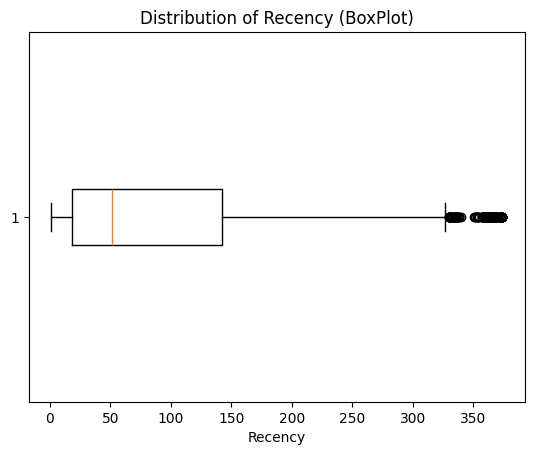

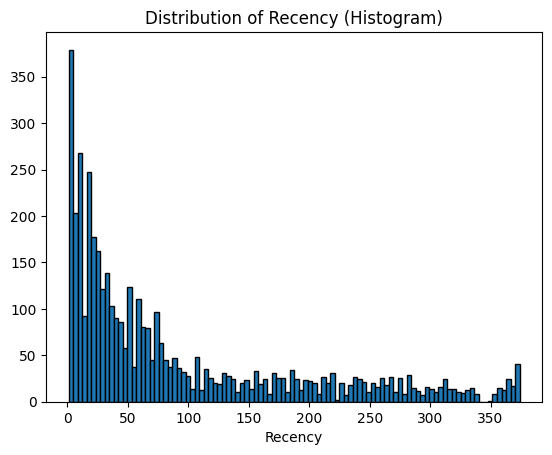

In [ ]:
#Recency
fig, ax = plt.subplots()
ax.boxplot(df_rfm['Recency'], vert = False)
ax.set_title('Distribution of Recency (BoxPlot)')
ax.set_xlabel('Recency')
fig, ax1 = plt.subplots()
ax1.hist(df_rfm['Recency'], bins = 100, edgecolor = 'black')
ax1.set_title('Distribution of Recency (Histogram)')
ax1.set_xlabel('Recency')

Recency has a mean value of 92.5 days with a standard deviation of approximately 100 days, suggesting that the mean may not be representative of the distribution. The median is 51 days, which is considerably lower than the mean. This indicates a positively skewed distribution, a pattern that is confirmed by the box plot. Additionally, the histogram shows that most customers made their last purchase relatively recently.

Text(0.5, 0, 'Frequency')

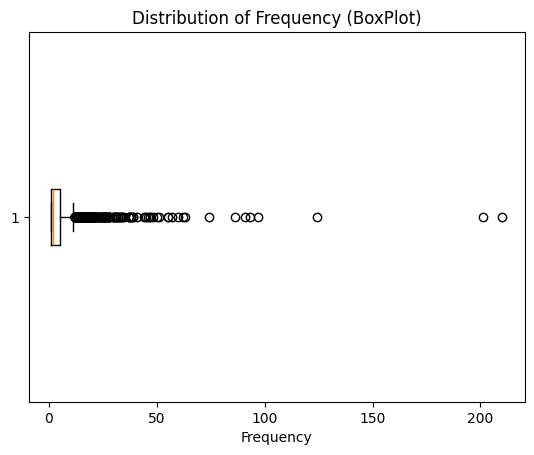

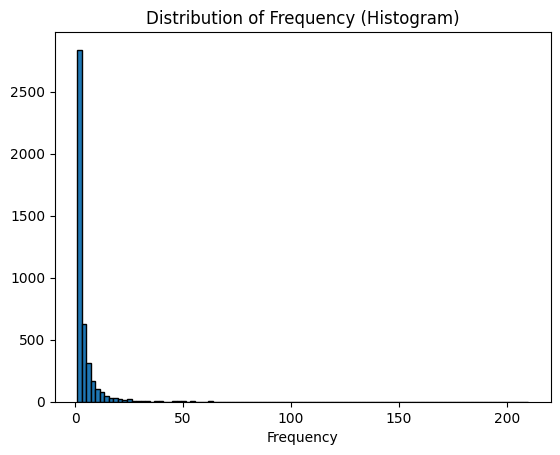

In [ ]:
#Frequency
fig, ax2 = plt.subplots()
ax2.boxplot(df_rfm['Frequency'], vert = False)
ax2.set_title('Distribution of Frequency (BoxPlot)')
ax2.set_xlabel('Frequency')
fig, ax3 = plt.subplots()
ax3.hist(df_rfm['Frequency'], bins = 100, edgecolor = 'black')
ax3.set_title('Distribution of Frequency (Histogram)')
ax3.set_xlabel('Frequency')

Frequency has a mean value of 4.27 with a standard deviation of approximately 7.7, suggesting a significant spread and a distribution that is not normal. The median is 2.0, which is considerably lower than the mean, indicating a strong positively skewed distribution. This pattern is confirmed by the box plot and histogram, which show that most customers have a low purchase frequency, but there are also extreme outliers corresponding to highly frequent buyers.

Text(0.5, 0, 'Monetary')

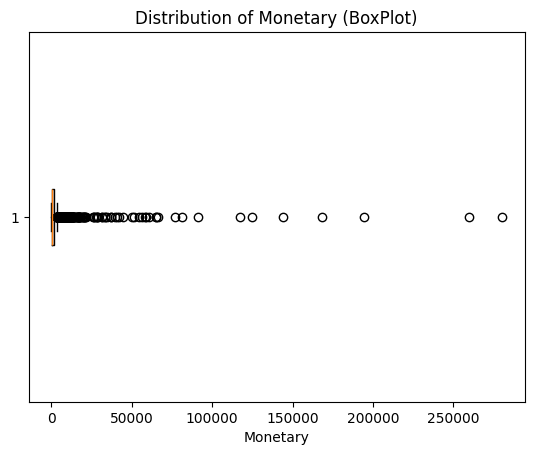

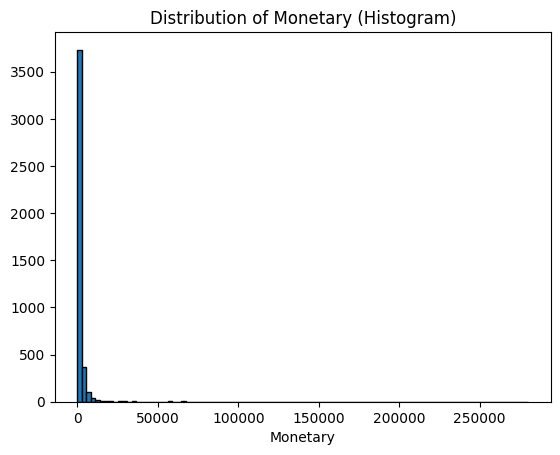

In [ ]:
#Monetary
fig, ax4 = plt.subplots()
ax4.boxplot(df_rfm['Monetary'], vert = False)
ax4.set_title('Distribution of Monetary (BoxPlot)')
ax4.set_xlabel('Monetary')
fig, ax5 = plt.subplots()
ax5.hist(df_rfm['Monetary'], bins = 100, edgecolor = 'black')
ax5.set_title('Distribution of Monetary (Histogram)')
ax5.set_xlabel('Monetary')

Monetary has a mean value of 2053.79 with a standard deviation of approximately 8988.25. The median is 674.45, which is significantly lower than the mean, indicating a very strong positively skewed distribution. This pattern is evident in the box plot and histogram, which show that the majority of customers have spent relatively low amounts, while a few extreme outliers correspond to very high-spending customers. This strong skewness and the presence of extreme outliers could disproportionately influence distance-based clustering algorithms.

Text(0.5, 0, 'TotalUnits')

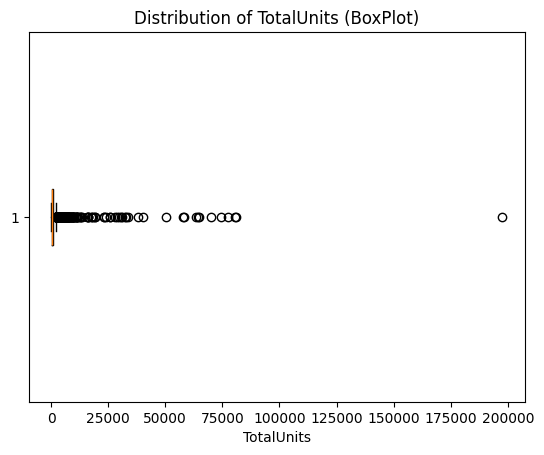

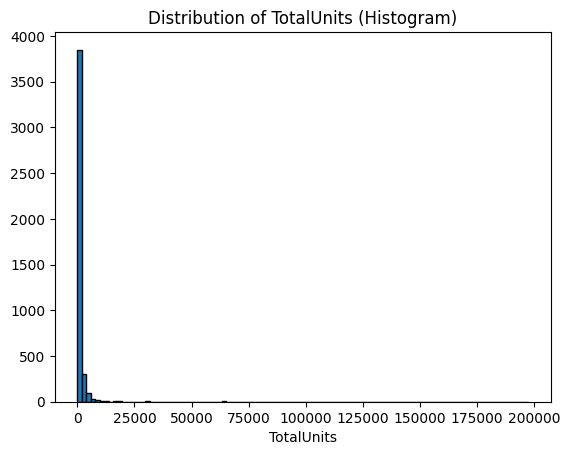

In [ ]:
#TotalUnits
fig, ax6 = plt.subplots()
ax6.boxplot(df_rfm['TotalUnits'], vert = False)
ax6.set_title('Distribution of TotalUnits (BoxPlot)')
ax6.set_xlabel('TotalUnits')
fig, ax7 = plt.subplots()
ax7.hist(df_rfm['TotalUnits'], bins = 100, edgecolor = 'black')
ax7.set_title('Distribution of TotalUnits (Histogram)')
ax7.set_xlabel('TotalUnits')

TotalUnits has a mean value of 1194.21 with a standard deviation of approximately 5055.60. The median is 379.0, considerably lower than the mean, pointing to a highly positively skewed distribution. Both the box plot and histogram confirm this, illustrating that most customers purchase a lower total quantity, while a small number of customers account for extremely high total unit purchases. Similar to Monetary, this extreme skewness and presence of outliers will need careful consideration for clustering algorithms.

Text(0.5, 0, 'UniqueProductCount')

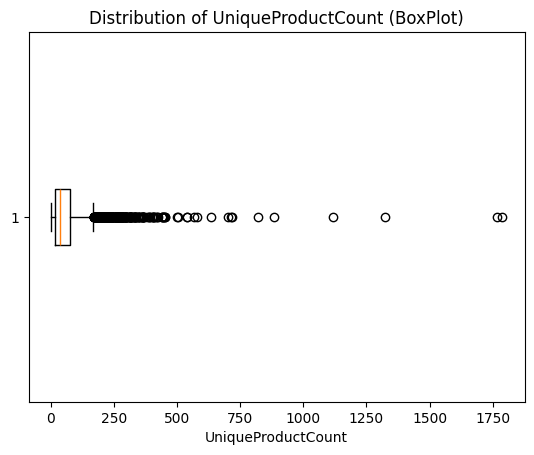

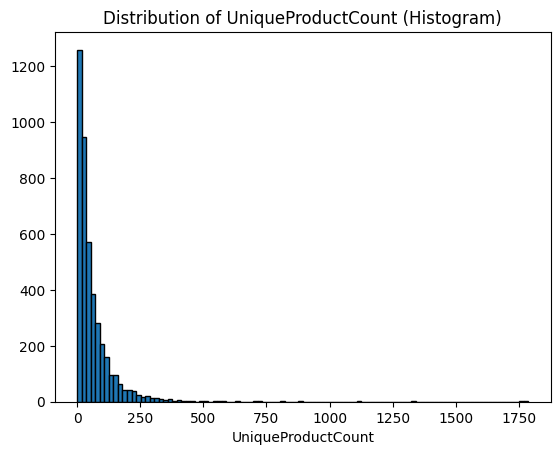

In [ ]:
#UniqueProductCount
fig, ax8 = plt.subplots()
ax8.boxplot(df_rfm['UniqueProductCount'], vert = False)
ax8.set_title('Distribution of UniqueProductCount (BoxPlot)')
ax8.set_xlabel('UniqueProductCount')
fig, ax9 = plt.subplots()
ax9.hist(df_rfm['UniqueProductCount'], bins = 100, edgecolor = 'black')
ax9.set_title('Distribution of UniqueProductCount (Histogram)')
ax9.set_xlabel('UniqueProductCount')

UniqueProductCount has a mean value of 61.49 with a standard deviation of approximately 85.36. The median is 35.0, notably lower than the mean, suggesting a positively skewed distribution. The box plot and histogram indicate that most customers purchase a moderate number of unique products, but there are outliers who buy a very large variety of items. This skewness, while less extreme than Monetary or TotalUnits, still suggests that preprocessing might be beneficial for clustering.

Text(0.5, 0, 'MeanTicket')

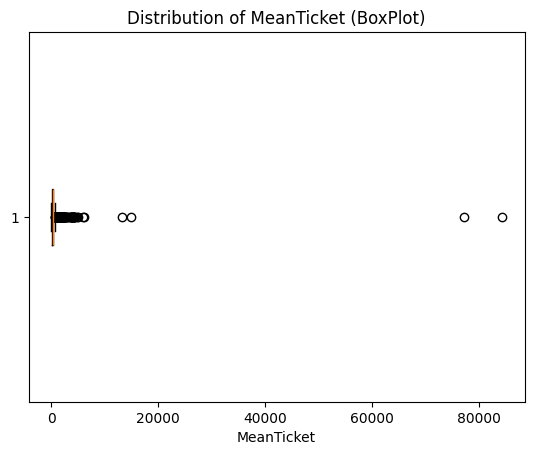

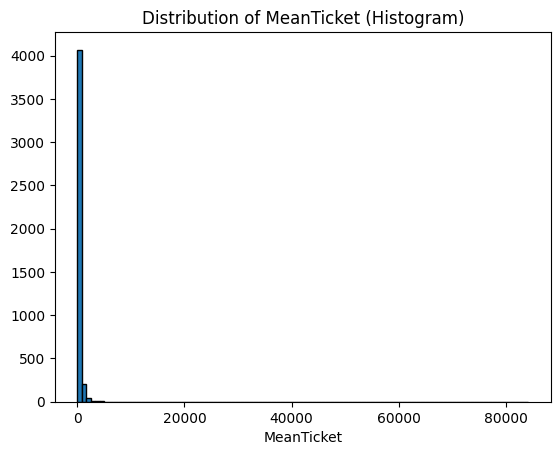

In [ ]:
#MeanTicket
fig, ax10 = plt.subplots()
ax10.boxplot(df_rfm['MeanTicket'], vert = False)
ax10.set_title('Distribution of MeanTicket (BoxPlot)')
ax10.set_xlabel('MeanTicket')
fig, ax11 = plt.subplots()
ax11.hist(df_rfm['MeanTicket'], bins = 100, edgecolor = 'black')
ax11.set_title('Distribution of MeanTicket (Histogram)')
ax11.set_xlabel('MeanTicket')

MeanTicket has a mean value of 419.05 with a standard deviation of approximately 1796.32. The median is 293.69, which is significantly lower than the mean, highlighting a strong positively skewed distribution. The box plot and histogram show that most customers have a lower average ticket value, but there are a few customers with exceptionally high mean ticket values. This variable, like Monetary, exhibits significant skewness and outliers, indicating that transformations will likely be necessary before clustering to ensure equitable weighting among all variables

# Feature Selection and Correlations

Text(0.5, 1.0, 'Correlation Matrix')

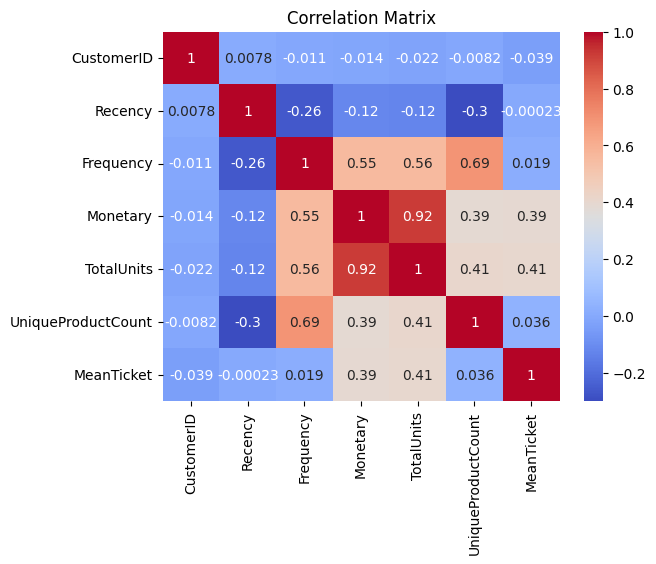

In [ ]:
corr_matrix = df_rfm.corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')

Although 6 variables were created at first, the analysis will be done taking into account only 4 of them. In order to avoid variables that may not add any new information and could be excessively redundant (distorting the model), TotalUnits (due to its high correlation rate with Monetary) and MeanTicket (its information is already contained in Monetary and Frequency). Keeping the set simple and clean.

In [ ]:
df_rfm_selected = df_rfm.drop(['TotalUnits','MeanTicket'], axis = 1)
df_rfm_selected.head()

,CustomerID,Recency,Frequency,Monetary,UniqueProductCount
0,12346,326,1,77183.60,1
1,12347,2,7,4310.00,103
2,12348,75,4,1797.24,22
3,12349,19,1,1757.55,73
4,12350,310,1,334.40,17


# Feature Transformation and Scaling

In [ ]:
df_clustering = df_rfm_selected.drop(['CustomerID'], axis = 1)
df_clustering.head()

,Recency,Frequency,Monetary,UniqueProductCount
0,326,1,77183.60,1
1,2,7,4310.00,103
2,75,4,1797.24,22
3,19,1,1757.55,73
4,310,1,334.40,17


In [ ]:
for col in df_clustering.columns:
  df_clustering[col] = np.log1p(df_clustering[col])
df_clustering.head()
df_clustering.describe()

,Recency,Frequency,Monetary,UniqueProductCount
count,4339.000000,4339.000000,4339.000000,4339.000000
mean,3.830475,1.345478,6.592108,3.551001
std,1.340215,0.683138,1.261411,1.132134
min,0.693147,0.693147,0.000000,0.693147
25%,2.944439,0.693147,5.730895,2.833213
50%,3.951244,1.098612,6.515379,3.583519
75%,4.962845,1.791759,7.416162,4.356709
max,5.926926,5.351858,12.543284,7.488853


All of the 4 variables that we chose for the analysis presented a strong positively skewed distribution with extreme outliers. To avoid distortions when calculating the distances between different points, and as a consecuence, when clasifying into clusters, the `np.log1p` transformation was applied to all four features: Recency, Frequency, Monetary, and UniqueProductCount. This transformation helps to reduce the skewness of the distributions, making them more symmetrical and closer to a normal distribution. Furthermore, it mitigates the disproportionate impact of extreme outlier values, ensuring that all features contribute more equitably to the clustering process.

Text(0, 0.5, 'Frequency')

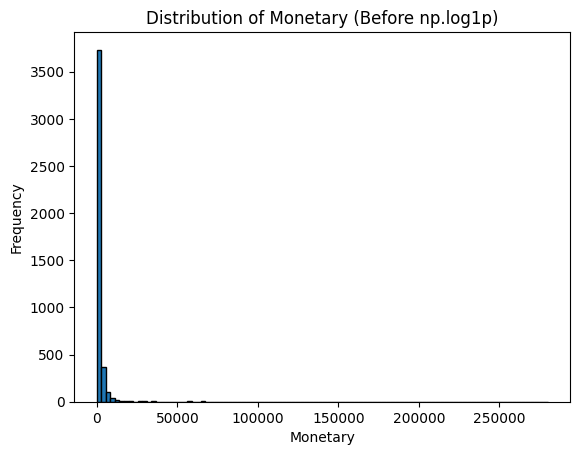

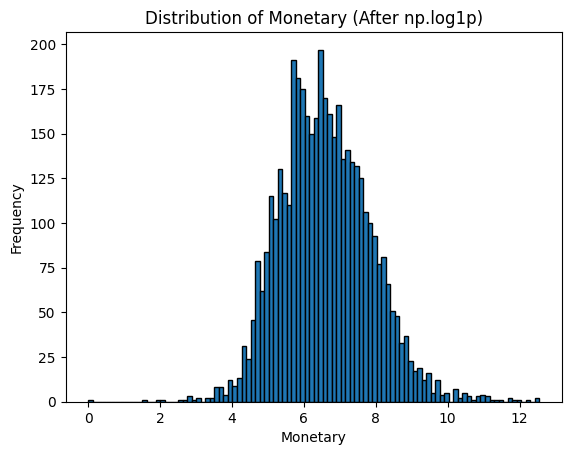

In [ ]:
fig, ax = plt.subplots()
ax.hist(df_rfm['Monetary'], bins = 100, edgecolor = 'black')
ax.set_title('Distribution of Monetary (Before np.log1p)')
ax.set_xlabel('Monetary')
ax.set_ylabel('Frequency')
fig, ax1 = plt.subplots()
ax1.hist(df_clustering['Monetary'], bins = 100, edgecolor = 'black')
ax1.set_title('Distribution of Monetary (After np.log1p)')
ax1.set_xlabel('Monetary')
ax1.set_ylabel('Frequency')

These histograms of Monetary show the difference between before and after applying the `np.log1p` transformation.

Text(0, 0.5, 'Frequency')

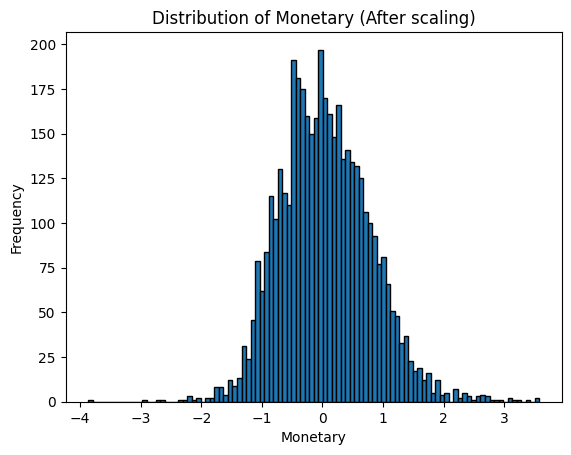

In [ ]:
scaler = skl.preprocessing.RobustScaler()
df_clustering_scaled = scaler.fit_transform(df_clustering)
fig, ax1 = plt.subplots()
ax1.hist(df_clustering_scaled[:,2], bins = 100, edgecolor = 'black')
ax1.set_title('Distribution of Monetary (After scaling)')
ax1.set_xlabel('Monetary')
ax1.set_ylabel('Frequency')

Scaling ensures that all features contribute equally to the distance calculations, preventing variables with larger numerical ranges from disproportionately influencing the clustering process. Although the `np.log1p` transformation was applied to reduce skewness and the influence of outliers on the model, some values might still act as outliers. Therefore, the Robust Scaler was used instead of the Standard Scaler.

# Clustering (K-Means)

The K-Means algorithm was chosen for this analysis due to its efficiency when working with large datasets (as is the case).

**Determining number of clusters**

Text(0, 0.5, 'WCSS')

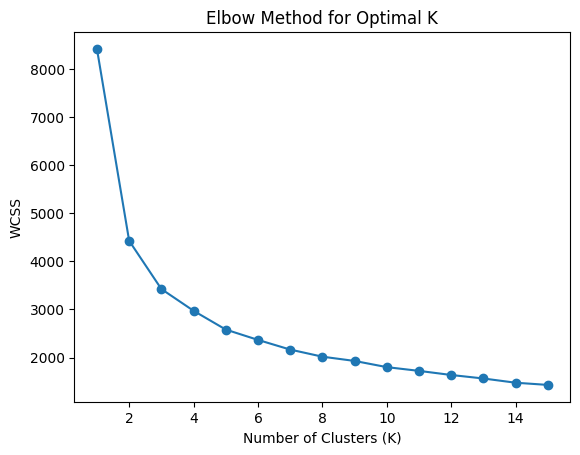

In [ ]:
#Elbow method
wcss_list = []
k_range = range(1,16, 1)
for k in k_range:
  k_means = skl.cluster.KMeans(n_clusters = k, random_state = 42, n_init = 'auto')
  k_means.fit(df_clustering_scaled)
  wcss_list.append(k_means.inertia_)
fig, ax = plt.subplots()
ax.plot(k_range, wcss_list, marker = 'o')
ax.set_title('Elbow Method for Optimal K')
ax.set_xlabel('Number of Clusters (K)')
ax.set_ylabel('WCSS')

Text(0, 0.5, 'Silhouette Score')

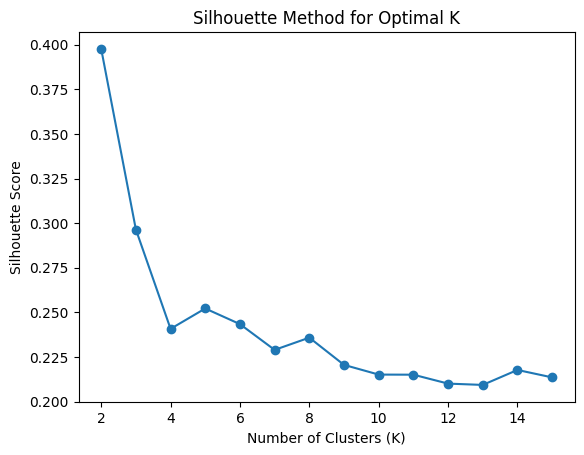

In [ ]:
#Silhouette method
score_list = []
k_range = range(2,16,1)
for k in k_range:
  k_means = skl.cluster.KMeans(n_clusters = k, random_state = 42, n_init = 'auto')
  k_means.fit(df_clustering_scaled)
  score_list.append(skl.metrics.silhouette_score(df_clustering_scaled, k_means.labels_))
fig, ax = plt.subplots()
ax.plot(k_range, score_list, marker = 'o')
ax.set_title('Silhouette Method for Optimal K')
ax.set_xlabel('Number of Clusters (K)')
ax.set_ylabel('Silhouette Score')

Observing the elbow method graph, it is noticeable that the “elbow” (the point where the curve starts to stabilize) appears between 3 and 4 clusters (k).

The silhouette method graph shows that the highest score is obtained with 2 clusters (k). Nevertheless, classifying customers into only 2 clusters may not provide enough business insight. From k = 4 onwards, the silhouette score stabilizes. Although it slightly increases for 5 or 6 clusters, using more clusters would overcomplicate the model without adding significant interpretability.

Therefore, the analysis will be carried out by classifying customers into **4 clusters**.

In [ ]:
#Final K-Means Clustering
k_means = skl.cluster.KMeans(n_clusters = 4, random_state = 42, n_init = 'auto')
k_means.fit(df_clustering_scaled)
df_rfm_selected['Cluster'] = k_means.labels_
df_rfm_selected.head()

,CustomerID,Recency,Frequency,Monetary,UniqueProductCount,Cluster
0,12346,326,1,77183.60,1,2
1,12347,2,7,4310.00,103,1
2,12348,75,4,1797.24,22,3
3,12349,19,1,1757.55,73,3
4,12350,310,1,334.40,17,2


In [ ]:
df_rfm_final = df_rfm_selected.groupby('Cluster')
avg_recency = df_rfm_final['Recency'].mean()
avg_frequency = df_rfm_final['Frequency'].mean()
avg_monetary = df_rfm_final['Monetary'].mean()
avg_unique_product_count = df_rfm_final['UniqueProductCount'].mean()
cluster_sizes = df_rfm_final.size()
cluster_percentage = cluster_sizes / cluster_sizes.sum()
cluster_total_revenue = df_rfm_final['Monetary'].sum()
cluster_revenue_share = cluster_total_revenue / cluster_total_revenue.sum()
cluster_analysis = pd.DataFrame({'AvgRecency': avg_recency,
                                 'AvgFrequency': avg_frequency,
                                 'AvgMonetary': avg_monetary,
                                 'AvgUniqueProductCount': avg_unique_product_count,
                                 'Size': cluster_sizes,
                                 'Percentage': cluster_percentage,
                                 'TotalRevenue': cluster_total_revenue,
                                 'RevenueShare': cluster_revenue_share})
cluster_analysis.head()

,AvgRecency,AvgFrequency,AvgMonetary,AvgUniqueProductCount,Size,Percentage,TotalRevenue,RevenueShare
Cluster,,,,,,,,
0,160.474174,1.300620,246.752779,8.376033,968,0.223093,238856.690,0.026803
1,13.567010,15.376289,9466.447148,180.989691,582,0.134132,5509472.240,0.618249
2,128.881743,1.764869,621.297788,34.352697,1446,0.333257,898396.602,0.100814
3,38.599404,4.300819,1686.286204,77.203276,1343,0.309518,2264682.372,0.254133


# Description and Visualization

**Cluster descriptions:**

-Cluster 0: This cluster is composed of customers whose last purchase was made a long time ago (high recency), with low frequency and low monetary values. They have purchased a very limited variety of products.
Although they represent 22.31% of the customer base, they only account for 2.68% of total revenue. These customers can clearly be considered low-value and inactive clients.

-Cluster 1: This cluster is composed of customers who made their last purchase very recently (low recency), with extremely high frequency and monetary values. They purchase a wide variety of products and show a very high level of engagement.
Although they represent only 13.41% of the customer base, they generate 61.82% of total revenue. This segment is clearly the most valuable one and should be strategically prioritized, as the company heavily depends on these customers.

-Cluster 2: Customers in this cluster have not purchased for a relatively long period (high recency), while showing low-to-moderate frequency and monetary values. They buy a moderate variety of products.
They represent 33.33% of the customer base but contribute only 10.08% of total revenue. These customers may be considered at risk, as they previously generated some value but are currently disengaged.

-Cluster 3: This cluster includes customers who purchased relatively recently (moderate/low recency), with a moderate frequency and strong monetary values. They buy a considerable variety of products and show consistent purchasing behavior. Representing 30.95% of customers and generating 25.41% of total revenue, this segment is strategically important and shows potential for further growth through retention and upselling strategies.


In [ ]:
cluster_names = {0: 'Low-Value Inactive Customers',
                 1: 'High-Value Loyal Customers',
                 2: 'At-Risk Customers',
                 3: 'Promising Customers'}
cluster_analysis = cluster_analysis.rename(index = cluster_names)
cluster_analysis.head()

,AvgRecency,AvgFrequency,AvgMonetary,AvgUniqueProductCount,Size,Percentage,TotalRevenue,RevenueShare
Cluster,,,,,,,,
Low-Value Inactive Customers,160.474174,1.300620,246.752779,8.376033,968,0.223093,238856.690,0.026803
High-Value Loyal Customers,13.567010,15.376289,9466.447148,180.989691,582,0.134132,5509472.240,0.618249
At-Risk Customers,128.881743,1.764869,621.297788,34.352697,1446,0.333257,898396.602,0.100814
Promising Customers,38.599404,4.300819,1686.286204,77.203276,1343,0.309518,2264682.372,0.254133


**Visualization:**

/tmp/ipython-input-949968661.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cluster_analysis.index, rotation=90, ha='right')


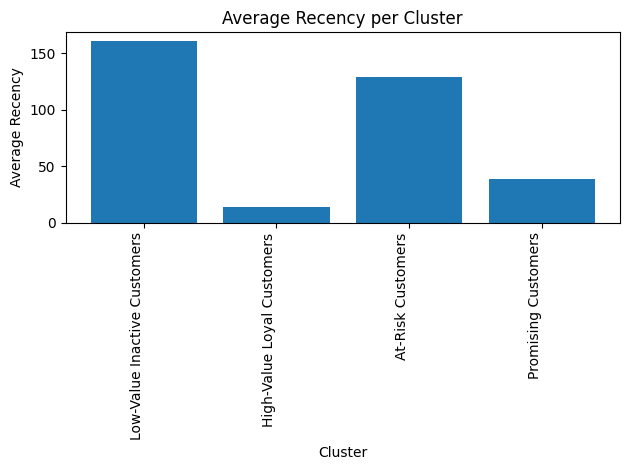

In [ ]:
fig, ax = plt.subplots()
ax.bar(cluster_analysis.index, cluster_analysis['AvgRecency'])
ax.set_xticklabels(cluster_analysis.index, rotation=90, ha='right')
ax.set_title('Average Recency per Cluster')
ax.set_xlabel('Cluster')
ax.set_ylabel('Average Recency')
plt.tight_layout()
plt.show()

/tmp/ipython-input-23513173.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cluster_analysis.index, rotation=90, ha='right')


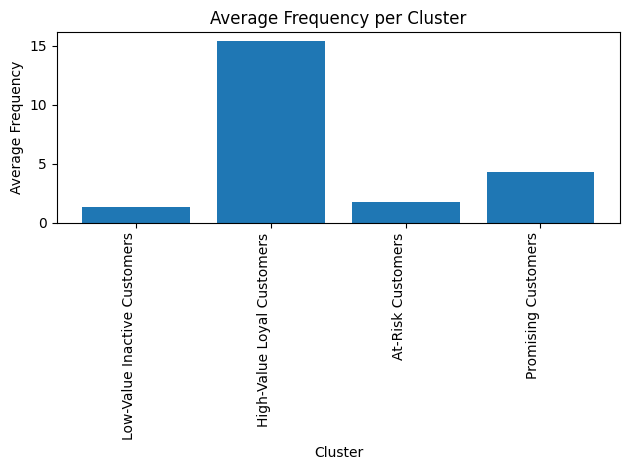

In [ ]:
fig, ax = plt.subplots()
ax.bar(cluster_analysis.index, cluster_analysis['AvgFrequency'])
ax.set_xticklabels(cluster_analysis.index, rotation=90, ha='right')
ax.set_title('Average Frequency per Cluster')
ax.set_xlabel('Cluster')
ax.set_ylabel('Average Frequency')
plt.tight_layout()
plt.show()

/tmp/ipython-input-1486299554.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cluster_analysis.index, rotation=90, ha='right')


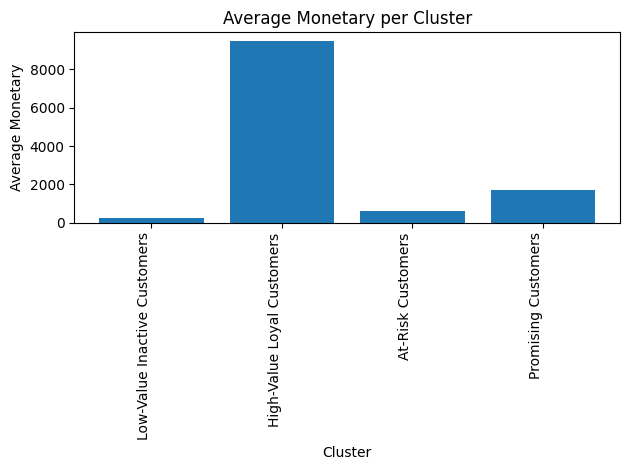

In [ ]:
fig, ax = plt.subplots()
ax.bar(cluster_analysis.index, cluster_analysis['AvgMonetary'])
ax.set_xticklabels(cluster_analysis.index, rotation=90, ha='right')
ax.set_title('Average Monetary per Cluster')
ax.set_xlabel('Cluster')
ax.set_ylabel('Average Monetary')
plt.tight_layout()
plt.show()

/tmp/ipython-input-772429603.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cluster_analysis.index, rotation=90, ha='right')


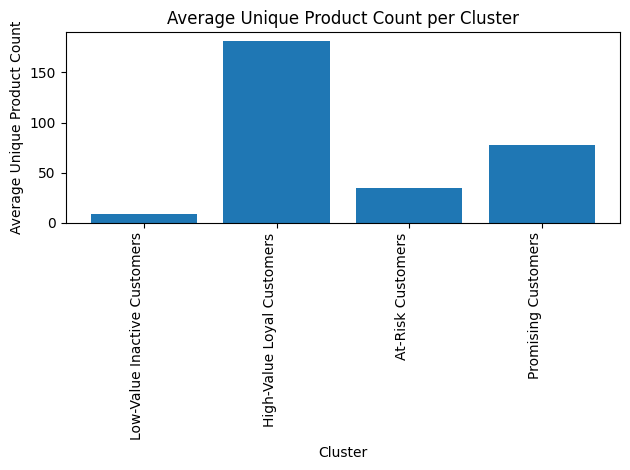

In [ ]:
fig, ax = plt.subplots()
ax.bar(cluster_analysis.index, cluster_analysis['AvgUniqueProductCount'])
ax.set_xticklabels(cluster_analysis.index, rotation=90, ha='right')
ax.set_title('Average Unique Product Count per Cluster')
ax.set_xlabel('Cluster')
ax.set_ylabel('Average Unique Product Count')
plt.tight_layout()
plt.show()

/tmp/ipython-input-1952338603.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cluster_analysis.index, rotation=90, ha='right')


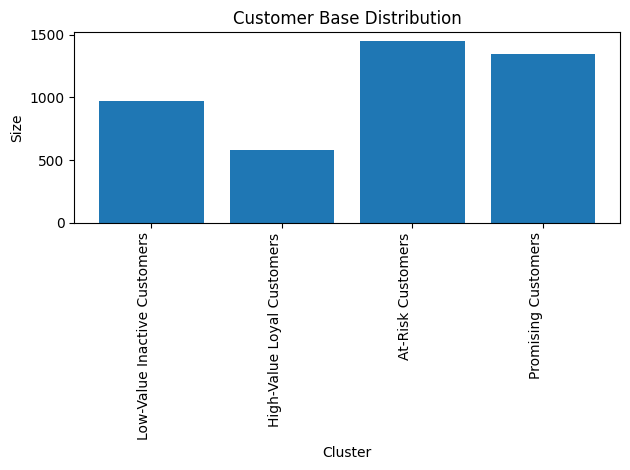

In [ ]:
fig, ax = plt.subplots()
ax.bar(cluster_analysis.index, cluster_analysis['Size'])
ax.set_title('Customer Base Distribution')
ax.set_xticklabels(cluster_analysis.index, rotation=90, ha='right')
ax.set_xlabel('Cluster')
ax.set_ylabel('Size')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Customer Base Distribution')

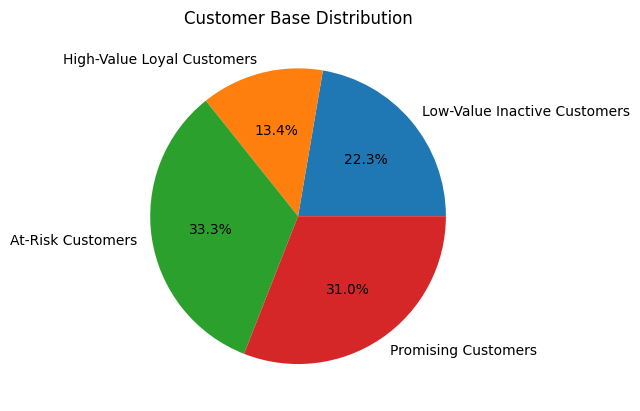

In [ ]:
fig, ax = plt.subplots()
ax.pie(cluster_analysis['Size'], labels = cluster_analysis.index, autopct = '%1.1f%%')
ax.set_title('Customer Base Distribution')

Text(0.5, 1.0, 'Revenue Share Distribution')

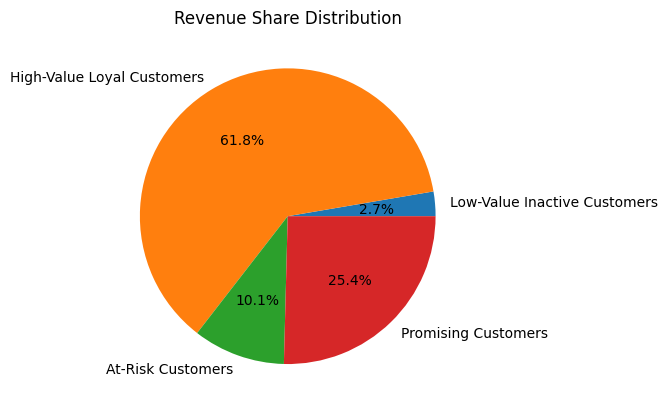

In [ ]:
fig, ax = plt.subplots()
ax.pie(cluster_analysis['RevenueShare'], labels = cluster_analysis.index, autopct = '%1.1f%%')
ax.set_title('Revenue Share Distribution')

# Strategic Recommendations

Our main strategic priority should focus on the High-Value Loyal Customers segment. Although this group is relatively small, it generates more than half of the total revenue, which implies a high revenue concentration. Investing in targeted actions for this segment requires a lower absolute budget compared to other groups, but it can generate a significant return.

The strategy should be focused on value retention and protection, through highly personalized direct marketing actions (segmented email marketing, exclusive communications, premium promotions). It is essential to reinforce a sense of exclusivity and belonging. In addition, early warning signals of decreasing purchase frequency should be monitored in order to prevent potential churn within this critical segment.

The Promising Customers segment represents a clear growth opportunity. These clients have purchased recently (low recency), but there is still room to increase their purchase frequency and monetary contribution. Since they represent around 31% of the customer base, even small increases in frequency could significantly impact total revenue.

Recommended actions include behavior-based cross-selling strategies, incentives aimed at increasing recurrence (loyalty points programs, repeat-purchase promotions), and campaigns designed to increase average spending. The strategic objective is to gradually convert part of this segment into high-value customers.

Regarding the Low-Value Customers, although they represent 22.3% of the customer base, they only contribute 2.7% of total revenue. From a budget optimization perspective, active investment in this segment is not recommended. Instead, low-cost automated actions may be maintained, while prioritizing resource allocation toward higher-potential segments.

Finally, the At-Risk Customers segment includes clients who generated value in the past but have reduced their activity. As they represent approximately one third of the customer base, it is strategically important to attempt reactivation. Personalized re-engagement campaigns with time-limited incentives (“come back and get…”) are recommended to stimulate a new purchase. Once reactivated, these customers can be integrated into loyalty programs similar to those designed for the Promising segment.

# Limitations

**K-Means Assumptions**
K-Means assumes that clusters are spherical, of similar size, and have comparable variances. It also relies on Euclidean distance, which may not properly capture complex or irregular customer behavior patterns. In real-world datasets, these assumptions are rarely fully met. Although transformations and scaling were applied to mitigate this issue, the underlying data distribution may still influence the quality and interpretability of the segmentation.

**Static Data Window**
The analysis is based on a specific historical time period. Customer behavior may evolve over time due to seasonality, market trends, competitive actions, or internal strategic changes. Therefore, the identified segments represent a temporal snapshot and should be periodically updated and revalidated using new data.

**Lack of Forward Validation**
RFM segmentation and clustering are descriptive techniques based on past behavior. While strategic recommendations are proposed to influence future outcomes, the model does not validate how customers will actually respond to these actions. A proper evaluation would require post-implementation monitoring and performance tracking.

**No Predictive Modeling Component**
This project focuses on customer segmentation rather than prediction. No predictive models were developed to estimate outcomes such as churn probability, customer lifetime value (CLV), or future purchase behavior. The proposed marketing strategies are based on segment characteristics and business interpretation, not on quantitative predictive outputs.

# Conclusion

This project aimed to segment customers based on their purchasing behavior using an RFM-based approach combined with K-Means clustering. By engineering customer-level variables and applying appropriate transformations and scaling techniques, four distinct customer segments were identified.

The results reveal a clear imbalance in revenue contribution, where a relatively small group of high-value loyal customers generates a significant proportion of total revenue. At the same time, large segments of low-value and at-risk customers present different strategic challenges and opportunities.

The segmentation provides actionable insights that can guide differentiated marketing strategies, allowing the company to prioritize high-impact customer groups while optimizing resource allocation.

Future work could extend this analysis by incorporating predictive models, such as churn prediction or Customer Lifetime Value estimation, in order to move from descriptive segmentation to forward-looking decision-making.